In [123]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# Añadir el directorio de la clase
sys.path.append('/home/guille/UOC/aguacates/tools/')
from ToolsClass import tools  # Importar la clase 'tools'

file = 'datos/avocado.csv'
data = pd.read_csv(file)
df = pd.DataFrame(data)
dfc = df.copy()

#Elimino la columna Unnamed
df = df.drop(columns=['Unnamed: 0'])
print(df.columns)
# Verificar si hay valores faltantes en el DataFrame
missing_values = pd.isnull(df)
missing_values

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False


In [125]:
# Descomposición de Series Temporales de Precios:
# Uso de Datos: Usa la columna AveragePrice y Date.
# df[['AveragePrice','Date']]
# Convierte Date a tipo datetime usando pd.to_datetime().
df['Date'] = pd.to_datetime(df['Date'])

In [132]:
# Esperado: Utiliza la función seasonal_decompose de la librería statsmodels para descomponer 
# la serie temporal de precios en componentes de tendencia, estacionalidad y ruido.
descomposicion = seasonal_decompose(df['AveragePrice'], model='additive',period=30)
# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.
promedio_por_fecha = pd.DataFrame(df.groupby('Date')['AveragePrice'].mean())
promedio_por_fecha

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


(array([2349, 2401, 2453, 2506, 2517]),
 [Text(2349, 0, 'Jan\n2015'),
  Text(2401, 0, 'Jan\n2016'),
  Text(2453, 0, 'Jan\n2017'),
  Text(2506, 0, 'Jan\n2018'),
  Text(2517, 0, '')])

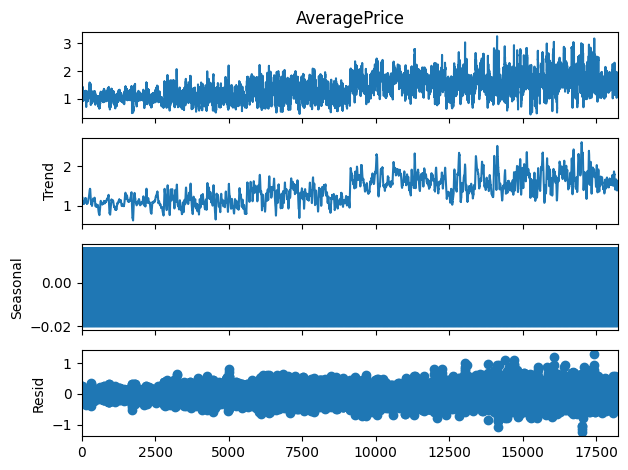

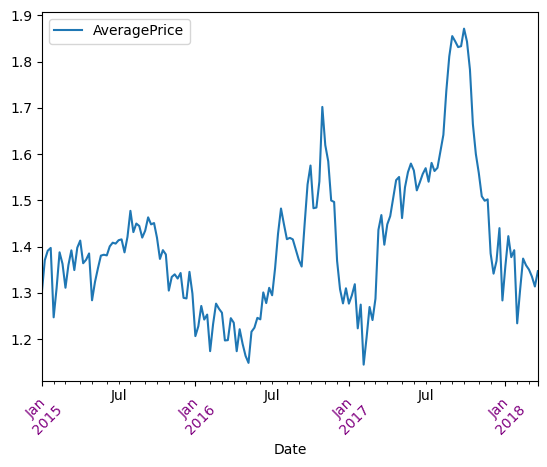

In [134]:
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos.
descomposicion.plot()
promedio_por_fecha.plot()
plt.xticks(rotation=45,color="purple") 

In [24]:
# Análisis de Estacionalidad por Región:
# Uso de Datos: Usa las columnas AveragePrice, Date y Total Volume.
cols = df[['AveragePrice','Date','Total Volume']]

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
promedio_anual = df.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()
promedio_anual

,region,year,AveragePrice
0,Albany,2015,1.538750
1,Albany,2016,1.533942
2,Albany,2017,1.637830
3,Albany,2018,1.435833
4,Atlanta,2015,1.380577
...,...,...,...
211,West,2018,1.297083
212,WestTexNewMexico,2015,1.259320
213,WestTexNewMexico,2016,1.246635
214,WestTexNewMexico,2017,1.281538


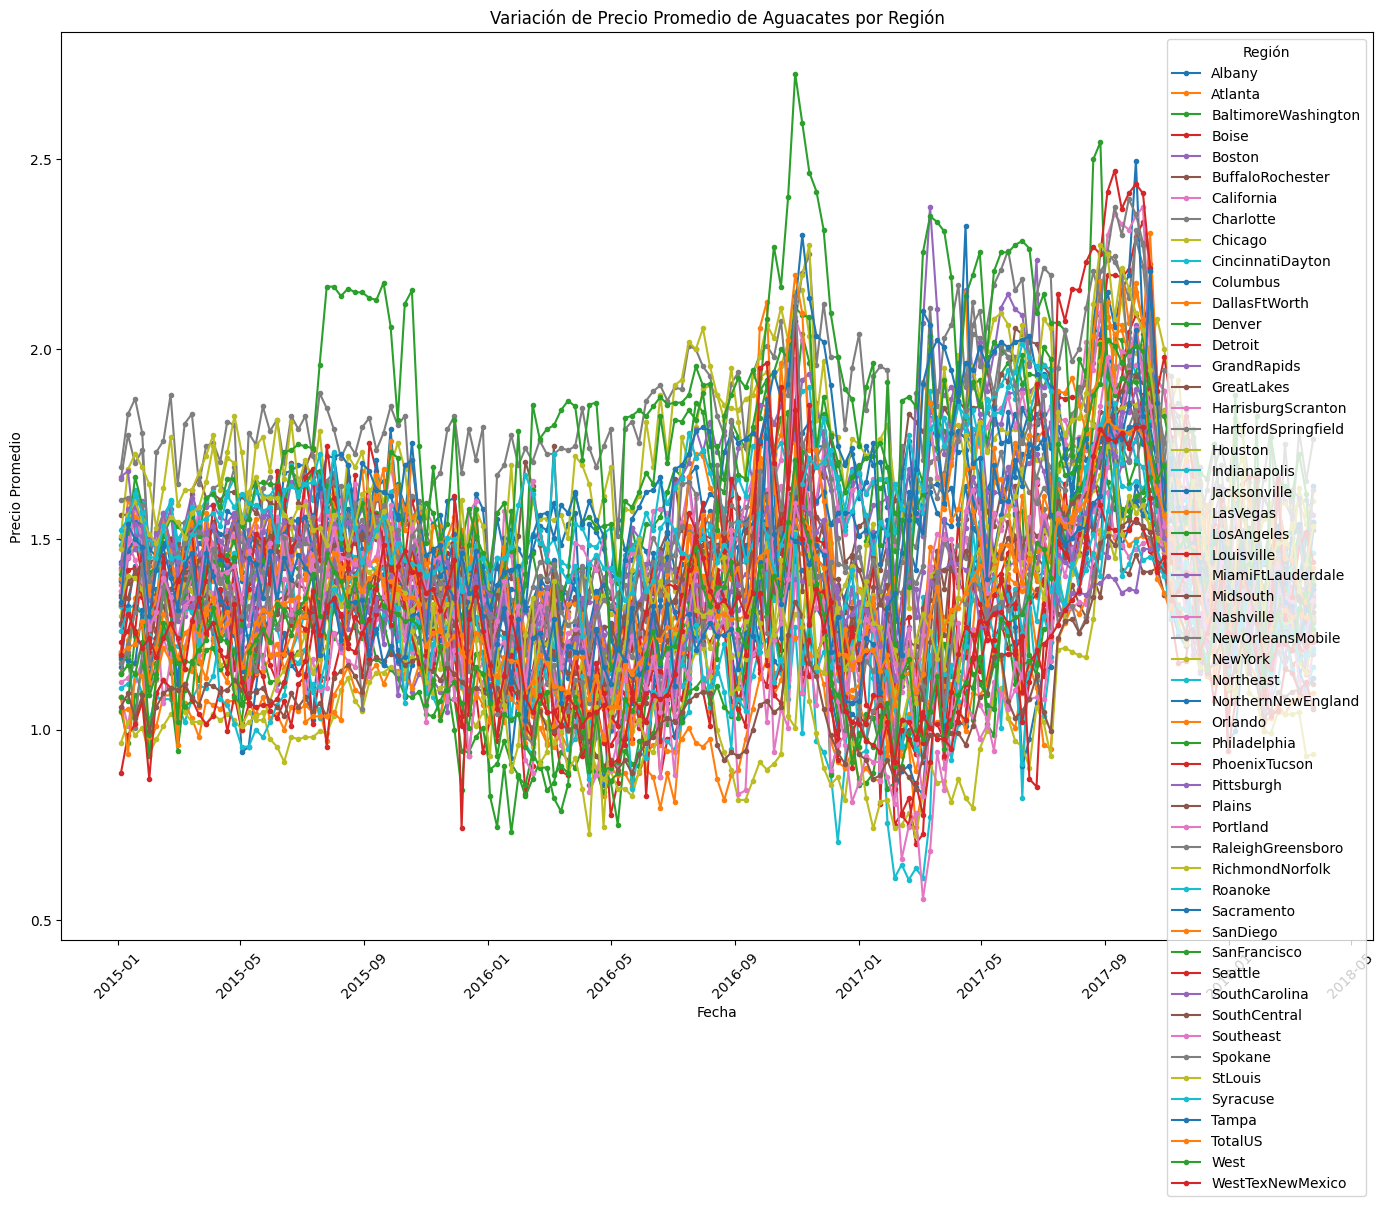

In [149]:
# Esperado: Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
# Agrupa los datos por 'region' y 'Date' y calcula el promedio de 'AveragePrice' para cada combinación
promedio = pd.DataFrame(df.groupby(['region', 'Date'])['AveragePrice'].mean().reset_index())
# Calcula el promedio de AveragePrice para cada región.
promedio2 = df.groupby(['region'])['AveragePrice'].mean().reset_index()
# promedio
# promedio2
# Representa gráficamente las tendencias utilizando plt.plot() de matplotlib.
# Configuración de la gráfica
plt.figure(figsize=(14,12))

# # Iterar sobre cada región y graficar la serie temporal
for region in promedio2['region'].unique():
    datos_region = promedio[promedio['region'] == region]
    plt.plot(datos_region['Date'], datos_region['AveragePrice'], label=region,marker='.')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio")
plt.title("Variación de Precio Promedio de Aguacates por Región")
plt.legend(title='Región', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

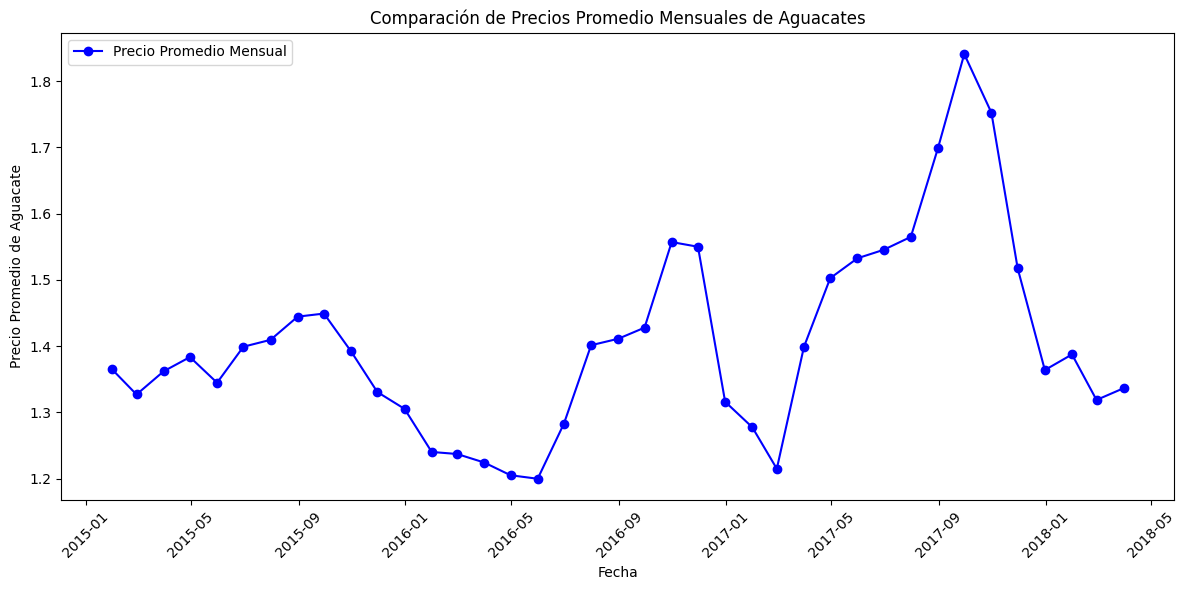

In [60]:
# Comparación de Precios Promedio Mensuales:

# Uso de Datos: Usa las columnas AveragePrice y Date.
# Esperado: Calcula y compara los precios promedio mensuales.
# Agrupa los datos por mes usando pd.Grouper con freq='M'.
# Calcula el promedio de AveragePrice para cada mes con mean().
# Visualiza los resultados con un gráfico de líneas usando plt.plot().

# Agrupamos por mes y calculamos el promedio de 'AveragePrice' para cada mes
df['Date'] = pd.to_datetime(df['Date'])
# Graficamos el precio promedio mensual
plt.figure(figsize=(12, 6))
plt.plot(promedio_mensual['Date'], promedio_mensual['AveragePrice'], marker='o', color='b', label='Precio Promedio Mensual')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio de Aguacate")
plt.title("Comparación de Precios Promedio Mensuales de Aguacates")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

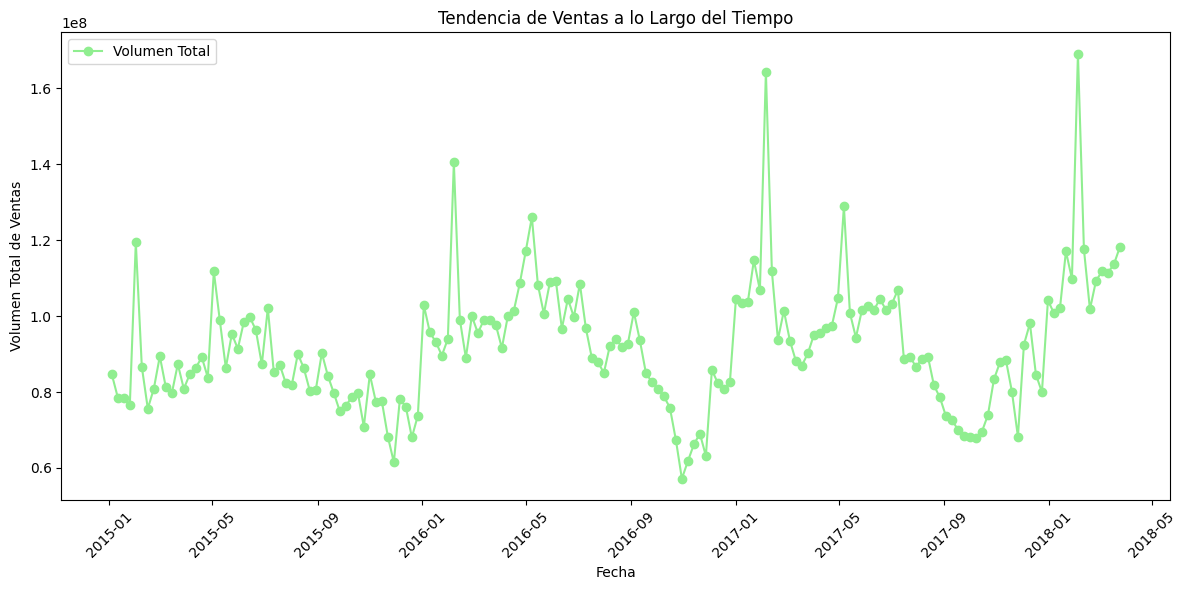

In [50]:
# Tendencia de Ventas a lo Largo del Tiempo:

# Uso de Datos: Usa las columnas Total Volume y Date.
# Esperado: Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
# Agrupa los datos por Date y suma el Total Volume usando groupby().
# Visualiza los resultados usando un gráfico de líneas con plt.plot() para mostrar la tendencia.
plt.figure(figsize=(12, 6))
# Agrupar por fecha y sumar el volumen total
df_grouped = df.groupby('Date').sum()['Total Volume']


# Crear gráfico de la tendencia de ventas
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', color='lightgreen', label='Volumen Total')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Volumen Total de Ventas")
plt.title("Tendencia de Ventas a lo Largo del Tiempo")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


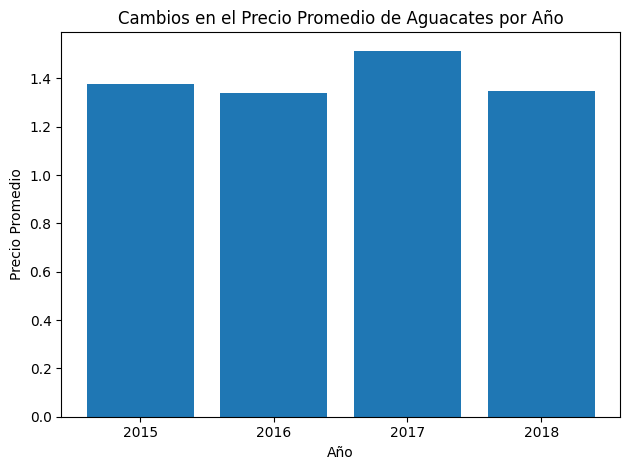

In [118]:
# Análisis de Cambios en Precios Anuales:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Observa las diferencias anuales en los precios promedio.
# Agrupa los datos por year utilizando groupby().
# Calcula el promedio de AveragePrice para cada año.
# Representa los resultados en un gráfico de barras usando plt.bar() que compare los precios de cada año.
promedio_year =  pd.DataFrame(df.groupby('year')['AveragePrice'].mean().reset_index())
# Crear el gráfico de barras
plt.bar(promedio_year['year'], promedio_year['AveragePrice'], width=0.8)

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.title("Cambios en el Precio Promedio de Aguacates por Año")
plt.xticks(promedio_year['year'])  # Asegura que se muestren todos los años
plt.tight_layout()
plt.show()

/tmp/ipykernel_966/2908662387.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['region'], y=df['Total Volume'], palette='viridis')


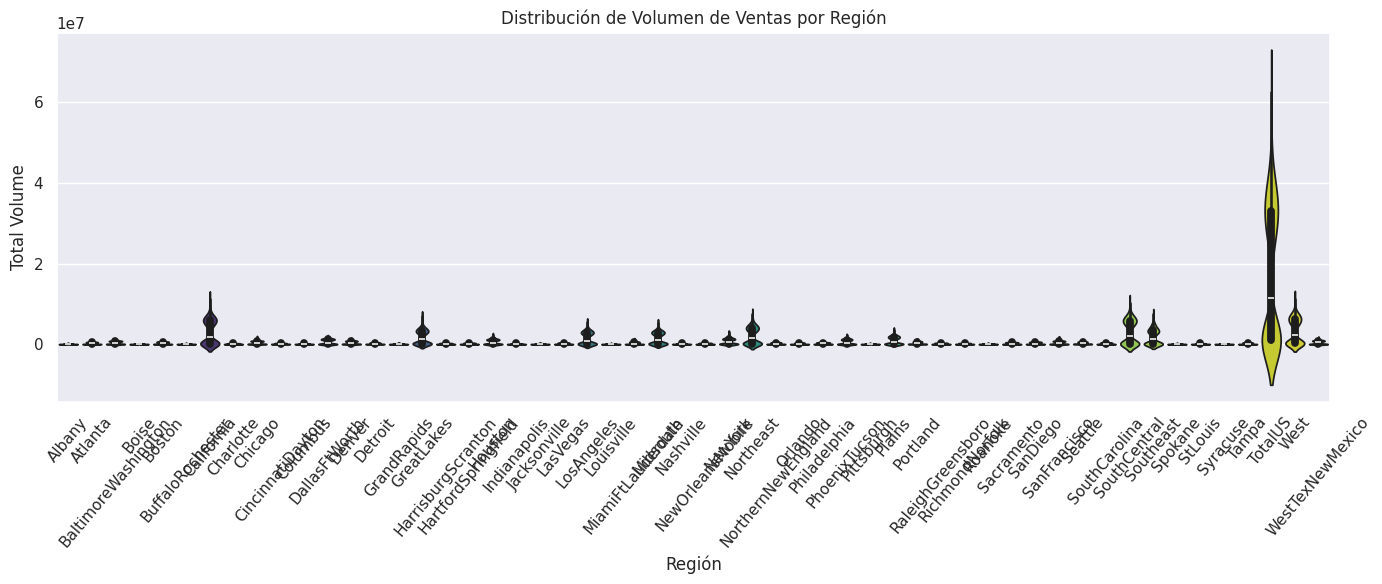

In [135]:
# 2. Gráficos para Visualización de Datos
# Resumen: La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. 
# Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

# Gráfico de Violín de Volumen de Ventas por Región:
# Uso de Datos: Usa las columnas Total Volume y region.
# Esperado: Visualiza la distribución de ventas en diferentes regiones.
# Utiliza la función violinplot de seaborn para crear gráficos de violín.
# Configura los ejes para mostrar la relación entre Total Volume y region.
# Añade etiquetas y títulos usando plt.title() y plt.xlabel() para facilitar la interpretación.

grouped_region = df.groupby('region').agg({
    'Total Volume': 'sum',
    'AveragePrice': 'mean'
}).reset_index()


# Limpio valores nulos
df = df.dropna(subset=['Total Volume', 'region'])

# Configuración de la gráfica
plt.figure(figsize=(14, 6))

# Crear el gráfico de violín
sns.violinplot(x=df['region'], y=df['Total Volume'], palette='viridis')

# Añadir etiquetas y título
plt.title("Distribución de Volumen de Ventas por Región")
plt.xlabel("Región")
plt.ylabel("Total Volume")
plt.xticks(rotation=50)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_966/3225710031.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='AveragePrice', data=df, palette='viridis')


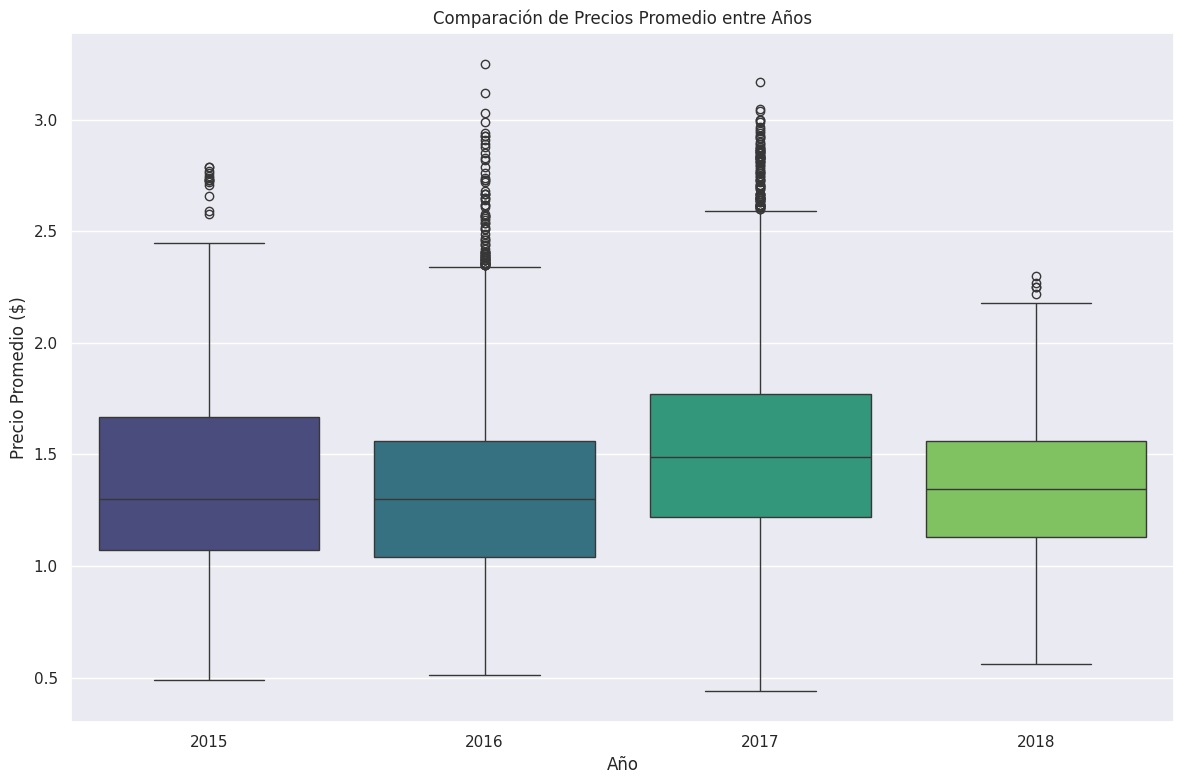

In [136]:
# Asegúrate de que 'year' es un tipo de dato categórico si es necesario
df['year'] = df['year'].astype(str)

# Configuración de la gráfica
plt.figure(figsize=(12, 8))

# Crear el boxplot
sns.boxplot(x='year', y='AveragePrice', data=df, palette='viridis')

# Añadir etiquetas y título
plt.title("Comparación de Precios Promedio entre Años")
plt.xlabel("Año")
plt.ylabel("Precio Promedio ($)")

# Mostrar el gráfico
plt.tight_layout()
plt.show()